In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from bidict import bidict
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

tf.random.set_seed(372)

In [2]:
ENCODER = bidict({
    'A': 1, 'I': 2, 'U': 3, 'E': 4, 'O': 5,
    'KA': 6, 'KI': 7, 'KU': 8, 'KE': 9, 'KO': 10,
    'SA': 11, 'SHI': 12, 'SU': 13, 'SE': 14, 'SO': 15,
    'TA': 16, 'CHI': 17, 'TSU': 18, 'TE': 19, 'TO': 20,
    'NA': 21, 'NI': 22, 'NU': 23, 'NE': 24, 'NO': 25,
    'HA': 26, 'HI': 27, 'FU': 28, 'HE': 29, 'HO': 30,
    'MA': 31, 'MI': 32, 'MU': 33, 'ME': 34, 'MO': 35,
    'YA': 36, 'YU': 37, 'YO': 38,
    'RA': 39, 'RI': 40, 'RU': 41, 'RE': 42, 'RO': 43,
    'WA': 44, 'WO': 45, 'N': 46
})

In [3]:
labels = np.load("../data/labels.npy")
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(1352,)

In [4]:
imgs = np.load("../data/imgs.npy")
imgs = imgs.astype("float32") / 255
imgs.shape

(1352, 50, 50)

In [5]:
# check out one of the images
# plt.figure()
# plt.imshow(imgs[1])
# plt.grid(False)
# plt.show()

In [6]:
imgs = np.expand_dims(imgs, -1)

In [7]:
labels, imgs = shuffle(labels, imgs)
split = .70

labels_train = labels[:int(len(labels)*split)]
labels_test = labels[int(len(labels)*split):]

imgs_train = imgs[:int(len(imgs)*split)]
imgs_test = imgs[int(len(imgs)*split):]

In [8]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=1)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [10]:
batch_size = 32
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(256, kernel_size=5, activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation="softmax"),
])

32 128-3-2 256-3-2 .9102
32 256-3-2 128-3-2 .9077
32 128-3-2 256-3-2 512-3-2 .9127
32 128-1-2 256-3-2 512-5-2 .9327
32 128-5-2 256-5-2 512-5-2 .9626

In [11]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [22]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

13/13 [==============================] - 23s 2s/step


In [23]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

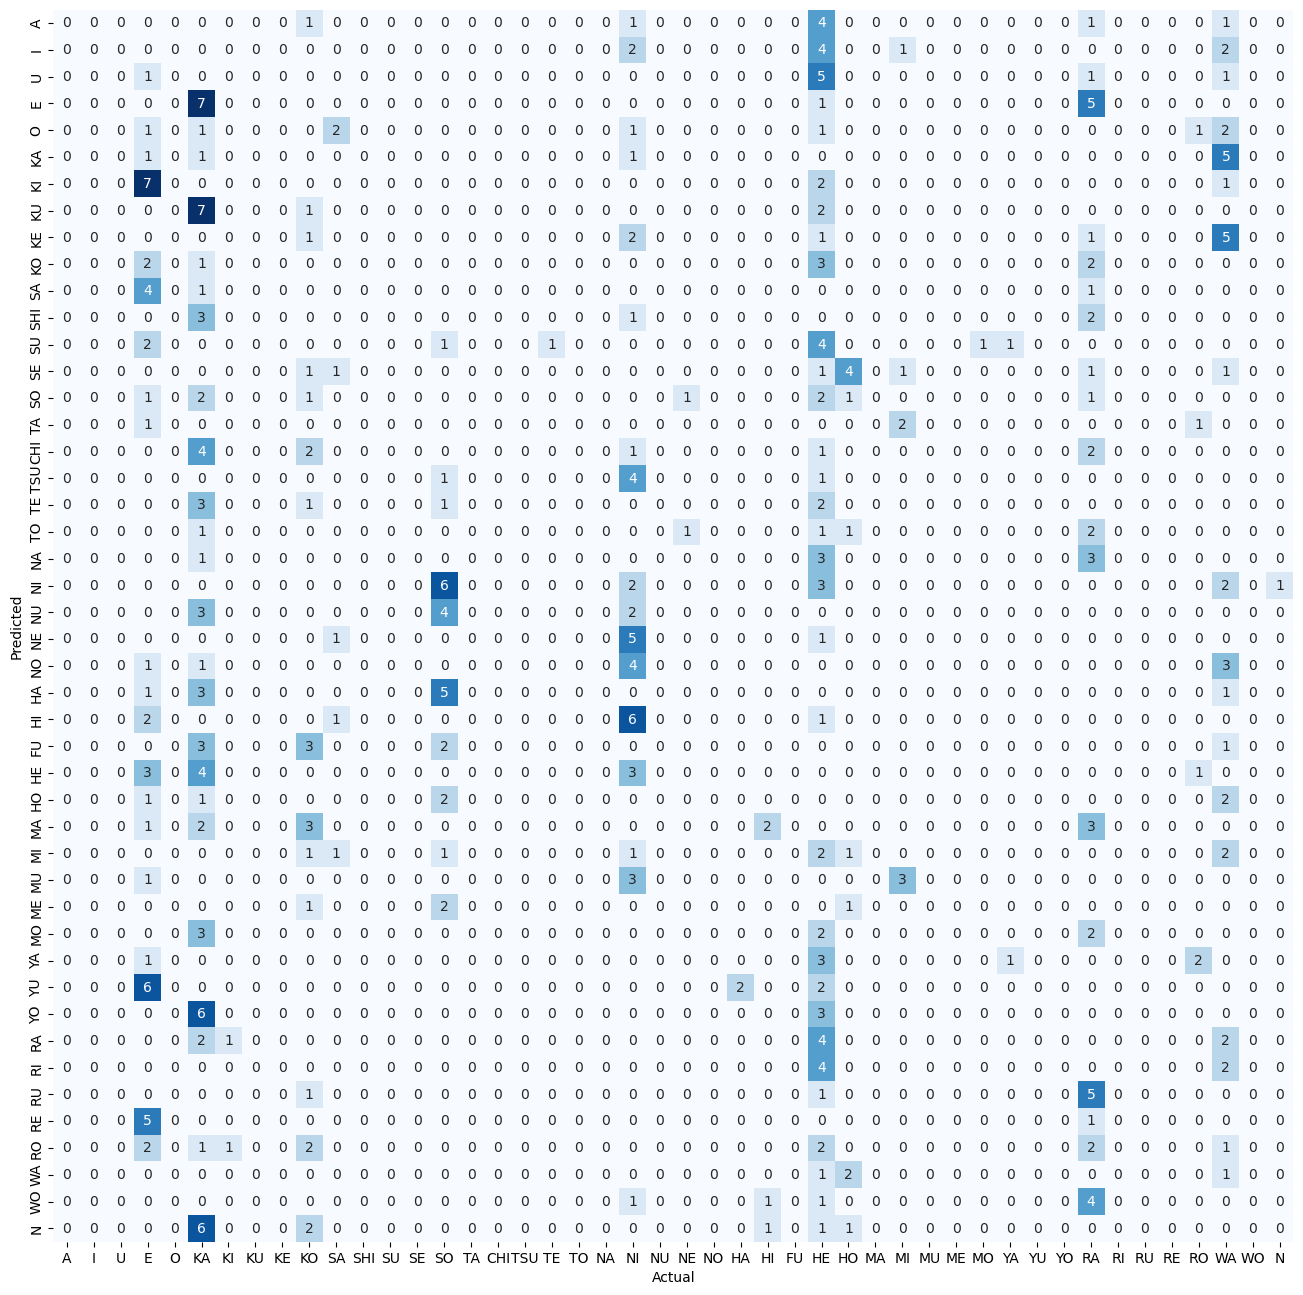

In [24]:
plt.figure(figsize=(16, 16))
sns.heatmap(cm,
            annot=True,
            cbar=False,
            cmap="Blues",
            xticklabels=list(ENCODER.keys()),
            yticklabels=list(ENCODER.keys()),
           )
plt.xticks(rotation=0)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [26]:
 model.save("../kana.model")

INFO:tensorflow:Assets written to: ../kana.model\assets


INFO:tensorflow:Assets written to: ../kana.model\assets
